## 서울시 인구, CCTV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
기관명         25 non-null object
소계          25 non-null int64
2011년 이전    23 non-null float64
2012년       23 non-null float64
2013년       23 non-null float64
2014년       25 non-null int64
2015년       25 non-null int64
2016년       25 non-null int64
2017년       25 non-null int64
2018년       25 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
기간          26 non-null int64
자치구         26 non-null object
세대          26 non-null int64
계           26 non-null int64
남자          26 non-null int64
여자          26 non-null int64
계.1         26 non-null int64
남자.1        26 non-null int64
여자.1        26 non-null int64
계.2         26 non-null int64
남자.2        26 non-null int64
여자.2        26 non-null int64
세대당인구       26 non-null float64
65세이상고령자    26 non-null int

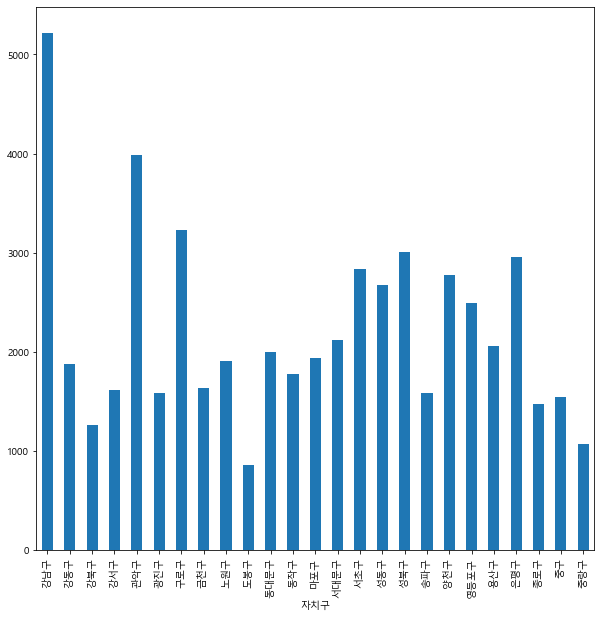

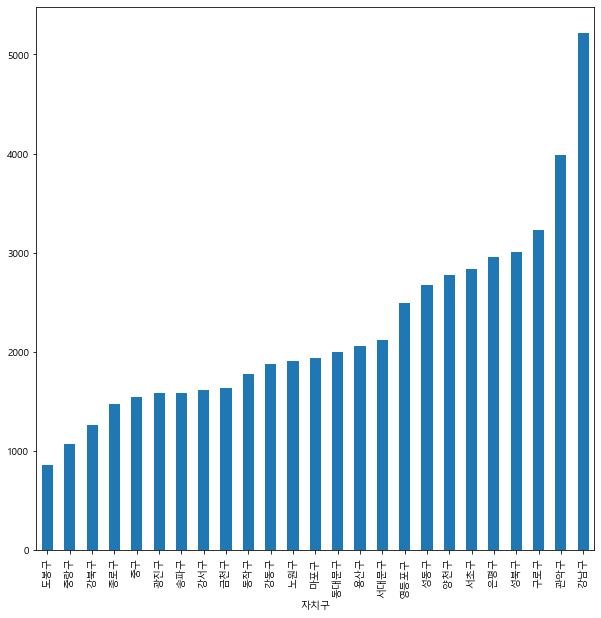

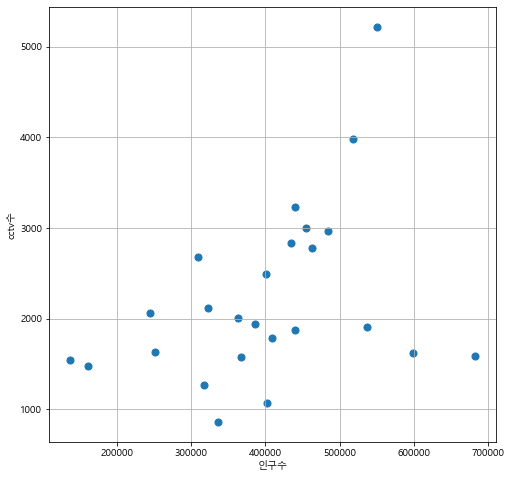

 
0.002878 x + 1067


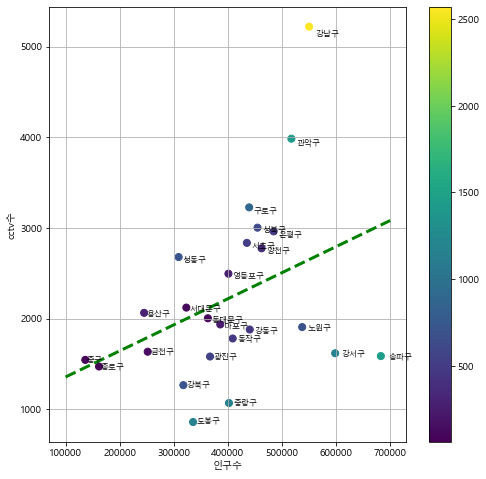

In [59]:
#=============================================================================================#


#필요한 패키지들 가져오기 
import numpy as np #수치연산, 선형대수, ndarray라는 자료 구조를 가진 패키지
import pandas as pd #Series, DF 자료구조를 가 패키지
import seaborn as sns #샘플데이터와 시각화
import matplotlib.pyplot as plt #그래프 그리기 패키지
#그래프 한글처리 패키지
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows': #윈도우즈라면
    font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin': #매킨토시(MacOS)라면
    rc('font', family='AppleGothic')


# 데이터 전처리 =============================================================================================#
    
    
cctv = pd.read_excel('./data/cctv.xlsx')
print(cctv.info())

#1.pop = pd.read_csv('./data/pop.txt') #데이터를 보니까 평상시 우리랑 보는거랑 많이 다름. 상단 2행은 불필요. 구분자도 ,가 아님. 천단위 구분자를 ,로 쓰는중
pop = pd.read_csv('./data/pop.txt', skiprows=2, delimiter='\t', thousands=',')
pop.head()
pop.info()


#2.cctv 시트의 컬럼이름을 pop.txt와 동일하게 맞춰주고 공백 제거해주기
cctv.rename(columns={cctv.columns[0]:'자치구'}, inplace=True)
gu = [] #2-1. 아무것도 없는 배열을 하나 만들어주기
for x in cctv['자치구']: #2-2.cctv 자치구 열의 모든 값을 x에 공백을 제거해서 gu에 추가해줘라.
    gu.append(x.replace(' ',''))
cctv['자치구'] = gu #2-3. gu값을 cctv 자치구 열에 넣어라
cctv

#3. pop에서 필요한 행과 열만 가져오기. 기간, 자치구, 계, 남자, 여자
pop = pop[['기간','자치구','계','남자','여자']]
pop.drop([0],inplace=True) #0번 행만 제거할게
pop

#4. 새로운 컬럼 추가하기 - 여자/계 * 100 
pop['여성비율'] = pop['여자']/pop['계']*100
pop

#5.cctv와 pop을 합치기 - 기준은 자치구!
df = pd.merge(cctv,pop,on='자치구')
df

#6.2019년만 가지고 비교할 거기 때문에 나머진 다 빼보자
df.drop(['2011년 이전','2012년','2013년','2014년','2015년','2016년','2017년','2018년','기간'],axis=1,inplace=True) #axis 설정안하면 행단위로 날아가 버린다.
df

#7. 자치구를 인덱스로 설정하자
df.set_index('자치구', inplace=True)
print(df)

# 그래프 그리기 ===================================================================================#

#8. cctv 수를 가지고 막대 그래프 그리기
df['소계'].plot(kind='bar', figsize=(10,10))
plt.show()


#9 cctv 수를 가지고 막대 그래프 그리기
df['소계'].sort_values().plot(kind='bar', figsize=(10,10))
plt.show()


# 산포도 그리기 ===================================================================================#

plt.figure(figsize=(8,8))
plt.scatter(df['계'], df['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('cctv수')
plt.grid()
plt.show()


# 계와 소계의 데이터를 가지고 회귀식 구하기 =======================================================#
fp1 = np.polyfit(df['계'], df['소계'], 1)
f1 = np.poly1d(fp1) 
print(f1)


# 선그래프 그리기 ================================================================================#

# 잔차를 색상으로 표시하고 지역 이름을 점 위에 출력하기
df['residual'] = np.abs(df['소계']-f1(df['계']))

fx = np.linspace(100000, 700000, 100)
plt.figure(figsize=(8,8))
plt.scatter(df['계'],df['소계'],c=df['residual'],s=50)
plt.plot(fx,f1(fx),ls='dashed', lw=3, color='g')

#그래프에 텍스트 출력하기.
for n in range(0,25):
    plt.text(df['계'][n]*1.02, df['소계'][n]*0.98, df.index[n], fontsize=8) #x보다 살짝 오른쪽. y값보다 살짝 밑에 좌표 위치 잡은게 1.02, 0.98. 수치 신경쓸 필요 x.


plt.xlabel('인구수')
plt.ylabel('cctv수')
plt.colorbar() #residual의 degree를 표시
plt.grid()
plt.show()